## HOUSE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("kathmandudata.csv")

In [3]:
#housing.head()

# Dropping unnecessary columns
1. Location is out of our scope, so it is dropped.
2. Dhur, Aana, Paisa and Daam is dropped as we have already converted them into square feet.

In [4]:
housing.drop(['location', 'dhur', 'Aana', 'Paisa', 'Daam', 'Years ago'], axis = 1, inplace = True)

In [5]:
#housing.head()

In [6]:
#housing.loc[6]

In [7]:
#housing['floors'].value_counts()

In [8]:
#housing['bathroom'].value_counts()

In [9]:
#housing.describe()

In [10]:
#%matplotlib inline

In [11]:
# # # For plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))

In [12]:
#housing.info()

# Filling Missing values
1. Filling N/A values of floors


In [13]:
housing=housing.replace('N/A', np.nan)
avgfloors=housing['floors'].mean().round(0)
avgbathroom=housing['bedroom'].mean().round(0)
print(avgfloors)


3.0


In [14]:
housing['floors'] = housing['floors'].replace(np.nan, avgfloors)
housing['bathroom']=housing['bedroom'].replace(0,1)

In [15]:
print(housing.loc[6])

bedroom                   0
bathroom                  1
floors                  3.0
parking                   0
roadsize(feet)         12.0
Road type         Gravelled
Area(sq ft)         1090.92
Price              11500000
Name: 6, dtype: object


In [16]:
q3, q1 = np.percentile(housing['Price'], [75 ,25])
iqr=q3-q1
iqr

16000000.0

# Label Encoding: One-Hot Encoder

In [17]:
#from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
#enc = OneHotEncoder(handle_unknown='ignore')

In [18]:
#dum_df = pd.get_dummies(housing[['Road type']],prefix=["Road"] )

In [19]:
#housing = housing.join(dum_df)
#housing

# Label Encoding:

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder = LabelEncoder()
housing['Road type'] = labelencoder.fit_transform(housing['Road type'])
#housing

In [22]:
#housing['Road type'].value_counts()

In [23]:
#housing['floors'].value_counts()

In [24]:
#housing.head()

# Normalization vs Standardization

In [25]:
# import pandas as pd
# from sklearn import preprocessing

# x = housing.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# housing = pd.DataFrame(x_scaled,columns = housing.columns)

In [26]:

# from sklearn.preprocessing import StandardScaler
# object= StandardScaler()

# # standardization 
# x_scaled= object.fit_transform(housing) 
# housing = pd.DataFrame(x_scaled,columns = housing.columns)


In [27]:
#housing.head()

# Train-Test Splitting

# Sklearn train_test_split

In [28]:
# from sklearn.model_selection import train_test_split
# train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['bathroom']):
     strat_train_set = housing.loc[train_index]
     strat_test_set = housing.loc[test_index]

In [30]:
 #strat_test_set['bathroom'].value_counts()

In [31]:
#strat_train_set['bathroom'].value_counts()

In [32]:
# strat_train_set['bedroom'].value_counts()


## Looking for Correlations

In [33]:
# corr_matrix = housing.corr()
# corr_matrix['Price'].sort_values(ascending=False)

## Relationship

In [34]:
# price_area_median = housing.groupby('Area(sq ft)').median()['Price']
# price_area_median
# # Create figure and subplot
# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)

# # Create plot with median data
# ax1.plot(price_area_median.index, price_area_median, color='r', label='Median')
# ax1.legend(loc='best')

# # Adding labels to the axis and title
# props1 = {'title':'Median Price of Houses',
#          'xlabel':'Price (NRS)',
#          'ylabel':'Bedroom'}
# ax1.set(**props1)

In [35]:
# price_bath_median = housing.groupby('bathroom').median()['Price']
# price_bath_median
# # Create figure and subplot
# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)

# # Create plot with median data
# ax1.plot(price_bath_median.index, price_bath_median, color='r', label='Median')
# ax1.legend(loc='best')

# # Adding labels to the axis and title
# props1 = {'title':'Median Price of Houses',
#          'xlabel':'Area(sq ft)',
#          'ylabel':'Price (NRS)'}
# ax1.set(**props1)

In [36]:
# price_bed_median = housing.groupby('floors').median()['Price']
# price_bed_median
# # Create figure and subplot
# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)

# # Create plot with median data
# ax1.plot(price_bed_median.index, price_bed_median, color='r', label='Median')
# ax1.legend(loc='best')

# # Adding labels to the axis and title
# props1 = {'title':'Median Price of Houses',
#          'xlabel':'Bedroom',
#          'ylabel':'Price (NRS)'}
# ax1.set(**props1)

In [37]:
# strat_train_set.shape

In [38]:
# strat_test_set.shape

In [39]:
housing_tr=strat_train_set.drop("Price", axis=1)

In [40]:
housing_price=strat_train_set["Price"].copy()

In [41]:
housing_te=strat_test_set.drop("Price", axis=1)

In [42]:
housing_price_te=strat_test_set["Price"].copy()

In [43]:
# housing_price_te.describe()

## Selecting a desired model and training it

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_tr, housing_price)

LinearRegression()

In [45]:
#some_data = housing_tr.iloc[:4]

In [46]:
#some_labels = housing_price.iloc[:4]

In [47]:
# model.predict(some_data)

In [48]:
# list(some_labels)

## Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_tr)
mse = mean_squared_error(housing_price, housing_predictions)
rmse = np.sqrt(mse)

In [50]:
rmse/iqr

0.6724607427598669

In [51]:

mse/iqr

7235255.208850429

## Saving the model

In [52]:
from joblib import dump, load
dump(model, 'project.joblib') 

['project.joblib']

## Testing the model on test data

In [53]:

final_predictions = model.predict(housing_te)
final_mse = mean_squared_error(housing_price_te, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [54]:
NRMSE=final_rmse/14500000
NMSE=final_mse/14500000

In [55]:
print("The Normalized Mean Squared Error and Normalized Root Mean Squared Error is",NMSE,"and",NRMSE,"respectively.")

The Normalized Mean Squared Error and Normalized Root Mean Squared Error is 7552187.014205088 and 0.7216927904158956 respectively.


# Result Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

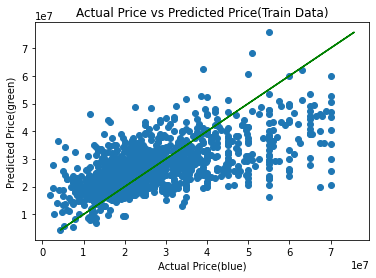

In [56]:
import matplotlib.pyplot as plot
plot.plot(housing_predictions,housing_predictions, color='green')
plot.scatter(housing_price,housing_predictions)
plot.title('Actual Price vs Predicted Price(Train Data)')
plot.xlabel('Actual Price(blue)')
plot.ylabel('Predicted Price(green)')
plot.show

<function matplotlib.pyplot.show(close=None, block=None)>

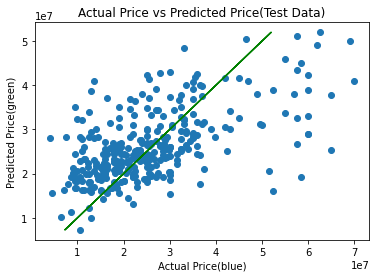

In [57]:
import matplotlib.pyplot as plot
plot.plot(final_predictions,final_predictions, color='green')
plot.scatter(housing_price_te,final_predictions)
plot.title('Actual Price vs Predicted Price(Test Data)')
plot.xlabel('Actual Price(blue)')
plot.ylabel('Predicted Price(green)')
plot.show

## Using the model

In [58]:
from joblib import dump, load
import numpy as np
model = load('project.joblib') 
features = np.array([[3,3,3.0,1,13.0,5,1755.75]])
y=model.predict(features)
print(y)

[27850257.80142898]


C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
housing.columns

Index(['bedroom', 'bathroom', 'floors', 'parking', 'roadsize(feet)',
       'Road type', 'Area(sq ft)', 'Price'],
      dtype='object')

In [60]:
3,5,3.0,2,13.0,5,1754.03

(3, 5, 3.0, 2, 13.0, 5, 1754.03)

In [61]:
def features(bedroom, bathroom, floors, parking, roadsize,
    Road_type, Area_sq_ft):
    x = np.array([bedroom, bathroom, floors, parking, roadsize,
    Road_type, Area_sq_ft])
    prediction = model.predict(x.reshape(1, -1))
    return f"RS. {prediction.round(0)}"

In [62]:
import gradio as gr
outputs = gr.outputs.Textbox()
a=gr.inputs.Dropdown(["1", "2", "3","4","5"])
app = gr.Interface(fn=features,article ="Road Type Index (Select a value as shown below)\n\n1=Blacktopped\n\n2=Concrete\n\n3=Gravelled\n\n4=Paved\n\n5=Soil Stabilized", inputs=['number','number','number','number','number',a,'number'],description="This model predicts the price of houses of Kathmandu.",outputs=outputs)

In [63]:
app.launch(server_name="0.0.0.0", server_port=4000)

Running on local URL:  http://localhost:4000/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x2ef28ecbe20>,
 'http://localhost:4000/',
 None)